<a href="https://colab.research.google.com/github/hamiid96/Prediction-of-Product-Sales/blob/main/Copy_of_Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
*Abdulhamid Abuzarour*

## Project Overview

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Load and Inspect Data

In [ ]:
import numpy as np
import pandas as pd
import missingno as msn
fpath="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(fpath)

# we have 8523 rows, and 12 columns
cat_cols=df.select_dtypes("object").columns
cat_cols
# we have 7 categorical variables

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
num_cols=df.select_dtypes("number").columns
num_cols
# we have 5 numerical variables

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Checking for duplicates
duplicated_rows=df.duplicated()
duplicated_rows.sum()

# we dont have any duplicates in our dataset

0

In [ ]:
unique_variables_percentage=df.nunique()/len(df)*100
unique_variables=df.nunique()
unique_variables
df["Item_Fat_Content"].value_counts()
# Needs replacement

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
# Identifying missing values in cat_cols
df[cat_cols].isna().sum()
# we have 2410 missing values in the Outlet_Size feature

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
# Identifying missing values in num_cols
df[num_cols].isna().sum()
# we have 1463 missing values in Item_Weight feature

,0
Item_Weight,1463
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [ ]:
df[["Outlet_Identifier", "Outlet_Size"]].value_counts()

,,count
Outlet_Identifier,Outlet_Size,
OUT027,Medium,935
OUT013,High,932
OUT035,Small,930
OUT046,Small,930
OUT049,Medium,930
OUT018,Medium,928
OUT019,Small,528


In [ ]:
# we want to filter the missing values in Outlet_Size feature
filtered_rows=df[df["Outlet_Size"].isna()]
filtered_rows


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
# impute the missing values with "Small" value depending on:
# 1. Out010 is an Outlet_Identifier for Groceries, and all of the Groceries have "Small" Sizes
# 2. Out017 and Out045 are belonged to Type1, and the mode for Outlet_Size feature is "Small"

#df["Outlet_Size"]=df["Outlet_Size"].fillna("Small")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Modifying inconsistencies in the dataframe
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"})
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
# Modifying num_variables
df[num_cols].isna().sum()

,0
Item_Weight,1463
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [ ]:
# we want to correlate the Item_Weight with the Item_Type
df["Item_Type"].mode()[0]
df["Item_Type"].describe()
# the mode for Item_Type is Fruits and Vegetables
# the freq for Fruits and Vegetables is 1232 (the length)

,Item_Type
count,8523
unique,16
top,Fruits and Vegetables
freq,1232


In [ ]:
# Calculate the mean for Fruits and Vegetables
df["Item_Weight"]=df["Item_Weight"].fillna(df.groupby("Item_Type")["Item_Weight"].transform("mean"))


In [ ]:
# Checking the number of missing values
df["Item_Weight"].isna().sum()

0

## Clean Data

In [ ]:
# The following data is the cleaned dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

Text(0.5, 0, 'Item MRP ($)')

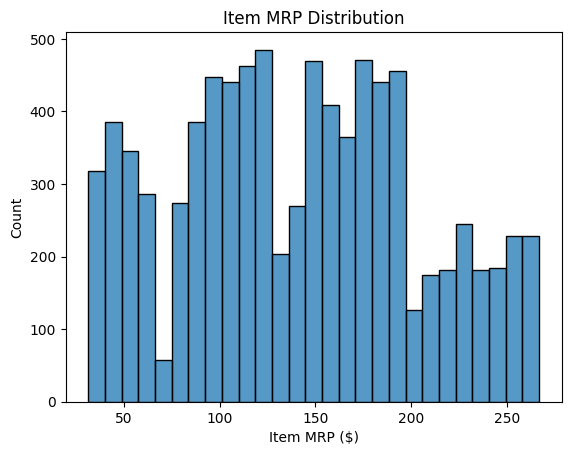

In [ ]:
from collections.abc import ItemsView
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram for Item_MRP
fig, ax= plt.subplots()
sns.histplot(data=df, x="Item_MRP")
ax.set_title("Item MRP Distribution")
ax.set_xlabel("Item MRP ($)")

Text(24.000000000000007, 0.5, 'Item Weight')

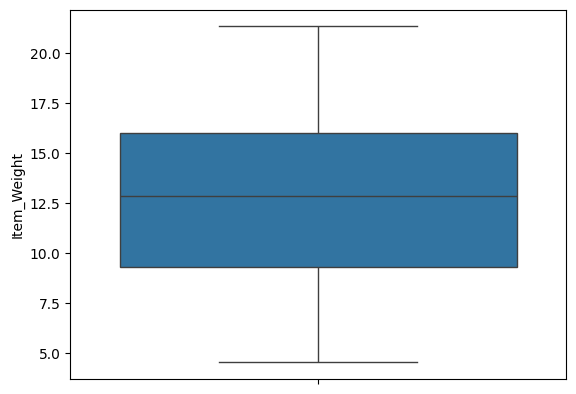

In [ ]:
# Boxplot for Item_Weight

sns.boxplot(data=df, y="Item_Weight")
ax.set_title("Item Weight Range")
ax.set_ylabel("Item Weight")

Text(0.5, 24.0, 'Type of Fat')

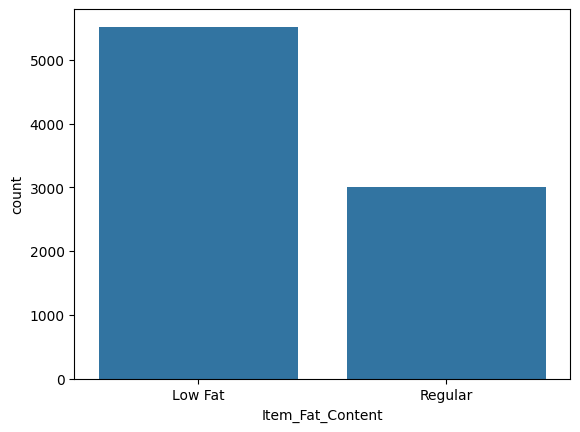

In [ ]:
# Countplot for Item_Fat_Content

sns.countplot(data=df, x="Item_Fat_Content")
ax.set_title("Item Fat Content")
ax.set_xlabel("Type of Fat")

<Axes: >

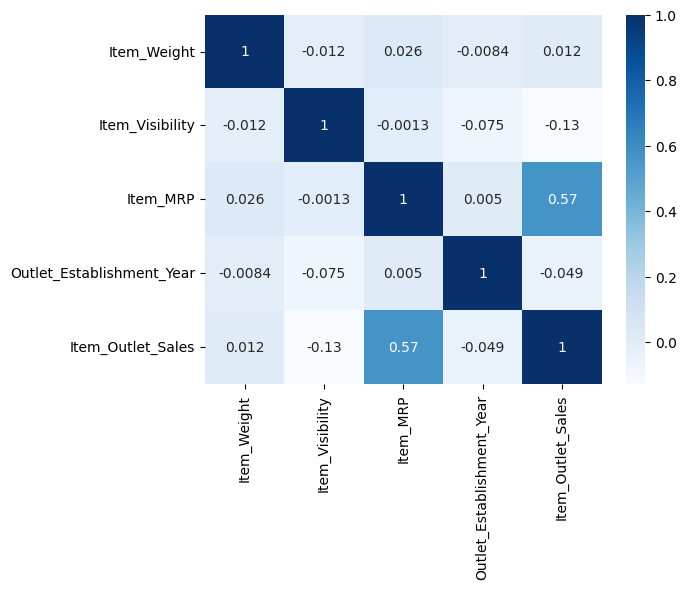

In [ ]:
# Heatmap for numerical features in the dataset

corr=df.corr(numeric_only=True)
sns.heatmap(corr, cmap="Blues", annot=True)

## Feature Inspection

In [ ]:
def explore_categorical(df, x, fillna = True, placeholder = 'NaN',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

<ipython-input-25-7ce4c00de47f>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


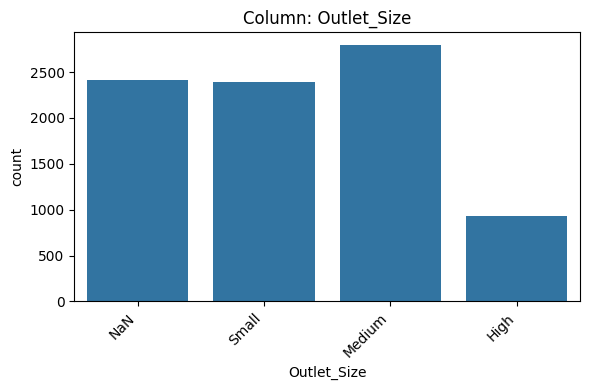

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [ ]:
size_order=["NaN", "Small", "Medium", "High"]
explore_categorical(df, "Outlet_Size", order=size_order)

What type of feature is it?
- Categorical (Ordinal)

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- Count = 2410
- Percentage = 28.28%
- Impute with NaN

Is the feature constant or quasi-constant?
- Not constant or quasi-constant

What is the cardinality? Is it high (>10)?
- 4, less than 10 which is not high cardinality

Would we know this feature before the target is determined?
- Yes

Is there a business case/understanding reason to exclude based on our business case?

In [ ]:
# Final version of function
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'NaN',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  plt.show()
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

<ipython-input-21-e4754c1fee9f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


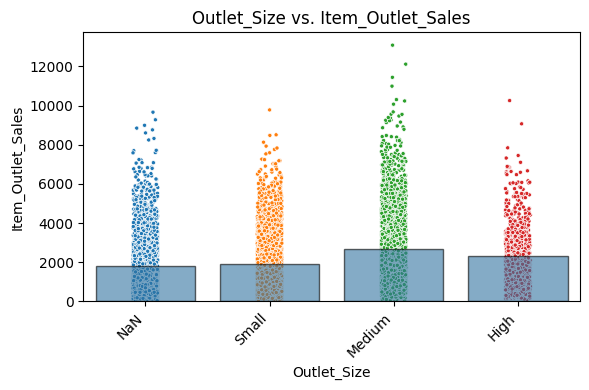

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:

size_order=["NaN", "Small", "Medium", "High"]
fig, ax = plot_categorical_vs_target(df, x='Outlet_Size', fillna=True, order=size_order)


Based on your business understanding, would you expect this feature to be a predictor of the target?
- Yes, I would expect that the outlet_size affect the item_outlet_size

Does this feature appear to be a predictor of the target?
- Yes, there is variability in prices across the outlet_size range of values